###Importes e leitura do arquivo

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from scipy import stats

arqv = pd.read_csv('BDAgro.csv', thousands = '.', decimal = ',', dtype = {'dotacao':np.float64,'empenhada': np.float64})
arqv

arqv.head()

,CNPJ,Nome,UF,MetdCult,NMaquinas,NTrabalhadores,Espacamen,PsMedBd,PsMedBi,BrixBd,BrixBi,temp,umidade,prec,ProdBd,ProdBi
0,01.001.001/0001-13,Agrarian Ventures,RN,DIRETO,3,58,1,30,19,53,32,24,80,488,5722,1425
1,01.001.001/0001-57,Agrarian Vent,RN,DIRETO,9,62,5,56,28,59,38,66,54,120,2000,1000
2,01.001.001/0001-38,Agrarian Ventures Co.,RN,PALHA,0,53,15,44,23,57,35,25,84,350,12719,2123
3,01.001.001/0001-82,Agrarian Ventures Co2,RN,PALHA,3,25,1,72,35,64,41,27,66,301,26610,3451
4,01.001.001/0001-23,AgriConnect,RN,DIRETO,7,32,15,37,20,54,33,23,93,335,7251,1719


In [2]:
arqv.tail()

,CNPJ,Nome,UF,MetdCult,NMaquinas,NTrabalhadores,Espacamen,PsMedBd,PsMedBi,BrixBd,BrixBi,temp,umidade,prec,ProdBd,ProdBi
295,01.001.001/0001-30,Sunflower Meadows,RN,PALHA,4,66,5,41,22,56,34,28,82,407,9767,1960
296,01.001.001/0001-74,Sunflower Meadows2,RN,PALHA,6,23,15,67,32,63,40,28,83,407,24686,3285
297,01.001.001/0001-20,Sustainable AgroTech1,RN,PALHA,5,36,15,34,19,53,33,29,85,306,6848,1678
298,01.001.001/0001-64,Sustainable AgroTech2,RN,PALHA,6,50,1,61,30,61,39,28,88,295,21662,2909
299,01.001.001/0001-85,TerraVerde,RN,DIRETO,5,30,1,74,36,64,42,31,94,276,26890,3502


Q1)  Calcule medidas de tendência central, como a média, mediana e moda. Calcule Medidas de
dispersão para entender a variabilidade dos dados. Isso pode incluir o desvio padrão, a variância
e a amplitude.

Número de Máquinas no campo:

In [6]:
media = arqv['NMaquinas'].mean()
mediana = arqv['NMaquinas'].median()
quartil = arqv['NMaquinas'].quantile(q=0.25)
moda = arqv['NMaquinas'].mode()
desv_pad = arqv['NMaquinas'].std()
variancia = arqv['NMaquinas'].var()
amplitude = arqv['NMaquinas'].max() - arqv['NMaquinas'].min()
coef_Variacao = media / desv_pad


print('Média: ', media)
print('Mediana: ', mediana)
print('Quartil: ', quartil)
print('Moda: ', moda)
print('Desvio Padrão: ', desv_pad)
print('Variância: ', variancia)
print('Amplitude: ', amplitude)
print('Coeficiente de Variacao: ', coef_Variacao)

Média:  5.036666666666667
Mediana:  5.0
Quartil:  2.0
Moda:  0    9
Name: NMaquinas, dtype: int64
Desvio Padrão:  3.167876316516272
Variância:  10.035440356744704
Amplitude:  10
Coeficiente de Variacao:  1.589918975184458


Números de Trabalhadores:

In [7]:
media = arqv['NTrabalhadores'].mean()
mediana = arqv['NTrabalhadores'].median()
quartil = arqv['NTrabalhadores'].quantile(q=0.25)
moda = arqv['NTrabalhadores'].mode()
desv_pad = arqv['NTrabalhadores'].std()
variancia = arqv['NTrabalhadores'].var()
amplitude = arqv['NTrabalhadores'].max() - arqv['NTrabalhadores'].min()
coef_Variacao = media / desv_pad


print('Média: ', media)
print('Mediana: ', mediana)
print('Quartil: ', quartil)
print('Moda: ', moda)
print('Desvio Padrão: ', desv_pad)
print('Variância: ', variancia)
print('Amplitude: ', amplitude)
print('Coeficiente de Variacao: ', coef_Variacao)

Média:  39.96666666666667
Mediana:  41.0
Quartil:  26.0
Moda:  0    44
Name: NTrabalhadores, dtype: int64
Desvio Padrão:  16.121784288690225
Variância:  259.91192865105904
Amplitude:  55
Coeficiente de Variacao:  2.4790473530094395


Espacamento do plantio:

In [9]:
media = arqv['Espacamen'].mean()
mediana = arqv['Espacamen'].median()
quartil = arqv['Espacamen'].quantile(q=0.25)
moda = arqv['Espacamen'].mode()
desv_pad = arqv['Espacamen'].std()
variancia = arqv['Espacamen'].var()
amplitude = arqv['Espacamen'].max() - arqv['Espacamen'].min()
coef_Variacao = media / desv_pad


print('Média: ', media)
print('Mediana: ', mediana)
print('Quartil: ', quartil)
print('Moda: ', moda)
print('Desvio Padrão: ', desv_pad)
print('Variância: ', variancia)
print('Amplitude: ', amplitude)
print('Coeficiente de Variacao: ', coef_Variacao)

Média:  7.0
Mediana:  5.0
Quartil:  1.0
Moda:  0     1
1     5
2    15
Name: Espacamen, dtype: int64
Desvio Padrão:  5.897678246195885
Variância:  34.78260869565217
Amplitude:  14
Coeficiente de Variacao:  1.186907747046922


Peso médio da batata doce (gramas):

In [10]:
media = arqv['PsMedBd'].mean()
mediana = arqv['PsMedBd'].median()
quartil = arqv['PsMedBd'].quantile(q=0.25)
moda = arqv['PsMedBd'].mode()
desv_pad = arqv['PsMedBd'].std()
variancia = arqv['PsMedBd'].var()
amplitude = arqv['PsMedBd'].max() - arqv['PsMedBd'].min()
coef_Variacao = media / desv_pad


print('Média: ', media)
print('Mediana: ', mediana)
print('Quartil: ', quartil)
print('Moda: ', moda)
print('Desvio Padrão: ', desv_pad)
print('Variância: ', variancia)
print('Amplitude: ', amplitude)
print('Coeficiente de Variacao: ', coef_Variacao)

Média:  118.99
Mediana:  117.0
Quartil:  67.75
Moda:  0    102
Name: PsMedBd, dtype: int64
Desvio Padrão:  58.34142874229519
Variância:  3403.722307692308
Amplitude:  200
Coeficiente de Variacao:  2.0395455264834306


Peso médio da batata inglesa (gramas):

In [11]:
media = arqv['PsMedBi'].mean()
mediana = arqv['PsMedBi'].median()
quartil = arqv['PsMedBi'].quantile(q=0.25)
moda = arqv['PsMedBi'].mode()
desv_pad = arqv['PsMedBi'].std()
variancia = arqv['PsMedBi'].var()
amplitude = arqv['PsMedBi'].max() - arqv['PsMedBi'].min()
coef_Variacao = media / desv_pad


print('Média: ', media)
print('Mediana: ', mediana)
print('Quartil: ', quartil)
print('Moda: ', moda)
print('Desvio Padrão: ', desv_pad)
print('Variância: ', variancia)
print('Amplitude: ', amplitude)
print('Coeficiente de Variacao: ', coef_Variacao)

Média:  52.696666666666665
Mediana:  53.0
Quartil:  33.5
Moda:  0    84
Name: PsMedBi, dtype: int64
Desvio Padrão:  22.538662187440366
Variância:  507.9912931995541
Amplitude:  75
Coeficiente de Variacao:  2.338056546054974


Teor de sólidos solúveis batata doce: a quantidade de açúcares e outros
compostos solúveis nos frutos, expressa em graus Brix.

In [12]:
media = arqv['BrixBd'].mean()
mediana = arqv['BrixBd'].median()
quartil = arqv['BrixBd'].quantile(q=0.25)
moda = arqv['BrixBd'].mode()
desv_pad = arqv['BrixBd'].std()
variancia = arqv['BrixBd'].var()
amplitude = arqv['BrixBd'].max() - arqv['BrixBd'].min()
coef_Variacao = media / desv_pad


print('Média: ', media)
print('Mediana: ', mediana)
print('Quartil: ', quartil)
print('Moda: ', moda)
print('Desvio Padrão: ', desv_pad)
print('Variância: ', variancia)
print('Amplitude: ', amplitude)
print('Coeficiente de Variacao: ', coef_Variacao)

Média:  75.65666666666667
Mediana:  77.0
Quartil:  63.0
Moda:  0    75
1    81
2    85
3    87
Name: BrixBd, dtype: int64
Desvio Padrão:  14.19803046620504
Variância:  201.5840691192865
Amplitude:  50
Coeficiente de Variacao:  5.328673356966585


Teor de sólidos solúveis batata inglesa: a quantidade de açúcares e outros
compostos solúveis nos frutos, expressa em graus Brix.

In [13]:
media = arqv['BrixBi'].mean()
mediana = arqv['BrixBi'].median()
quartil = arqv['BrixBi'].quantile(q=0.25)
moda = arqv['BrixBi'].mode()
desv_pad = arqv['BrixBi'].std()
variancia = arqv['BrixBi'].var()
amplitude = arqv['BrixBi'].max() - arqv['BrixBi'].min()
coef_Variacao = media / desv_pad


print('Média: ', media)
print('Mediana: ', mediana)
print('Quartil: ', quartil)
print('Moda: ', moda)
print('Desvio Padrão: ', desv_pad)
print('Variância: ', variancia)
print('Amplitude: ', amplitude)
print('Coeficiente de Variacao: ', coef_Variacao)

Média:  50.626666666666665
Mediana:  50.0
Quartil:  40.0
Moda:  0    64
Name: BrixBi, dtype: int64
Desvio Padrão:  11.937152406701733
Variância:  142.49560758082498
Amplitude:  40
Coeficiente de Variacao:  4.24110080375986


Temperatura:

In [14]:
media = arqv['temp'].mean()
mediana = arqv['temp'].median()
quartil = arqv['temp'].quantile(q=0.25)
moda = arqv['temp'].mode()
desv_pad = arqv['temp'].std()
variancia = arqv['temp'].var()
amplitude = arqv['temp'].max() - arqv['temp'].min()
coef_Variacao = media / desv_pad


print('Média: ', media)
print('Mediana: ', mediana)
print('Quartil: ', quartil)
print('Moda: ', moda)
print('Desvio Padrão: ', desv_pad)
print('Variância: ', variancia)
print('Amplitude: ', amplitude)
print('Coeficiente de Variacao: ', coef_Variacao)

Média:  27.266666666666666
Mediana:  27.0
Quartil:  25.0
Moda:  0    30
Name: temp, dtype: int64
Desvio Padrão:  4.031094304677026
Variância:  16.249721293199556
Amplitude:  54
Coeficiente de Variacao:  6.764085532563914


Umidade

In [15]:
media = arqv['umidade'].mean()
mediana = arqv['umidade'].median()
quartil = arqv['umidade'].quantile(q=0.25)
moda = arqv['umidade'].mode()
desv_pad = arqv['umidade'].std()
variancia = arqv['umidade'].var()
amplitude = arqv['umidade'].max() - arqv['umidade'].min()
coef_Variacao = media / desv_pad


print('Média: ', media)
print('Mediana: ', mediana)
print('Quartil: ', quartil)
print('Moda: ', moda)
print('Desvio Padrão: ', desv_pad)
print('Variância: ', variancia)
print('Amplitude: ', amplitude)
print('Coeficiente de Variacao: ', coef_Variacao)

Média:  86.90333333333334
Mediana:  86.5
Quartil:  83.0
Moda:  0    84
Name: umidade, dtype: int64
Desvio Padrão:  5.5259184580398255
Variância:  30.53577480490524
Amplitude:  46
Coeficiente de Variacao:  15.726495784043838


Precipitação (trimeste/mm)

In [16]:
media = arqv['prec'].mean()
mediana = arqv['prec'].median()
quartil = arqv['prec'].quantile(q=0.25)
moda = arqv['prec'].mode()
desv_pad = arqv['prec'].std()
variancia = arqv['prec'].var()
amplitude = arqv['prec'].max() - arqv['prec'].min()
coef_Variacao = media / desv_pad


print('Média: ', media)
print('Mediana: ', mediana)
print('Quartil: ', quartil)
print('Moda: ', moda)
print('Desvio Padrão: ', desv_pad)
print('Variância: ', variancia)
print('Amplitude: ', amplitude)
print('Coeficiente de Variacao: ', coef_Variacao)

Média:  403.56333333333333
Mediana:  402.5
Quartil:  326.0
Moda:  0    546
Name: prec, dtype: int64
Desvio Padrão:  89.71832168724966
Variância:  8049.377246376812
Amplitude:  589
Coeficiente de Variacao:  4.498115053245427


Producao total batata doce mensal (kg)

In [17]:
media = arqv['ProdBd'].mean()
mediana = arqv['ProdBd'].median()
quartil = arqv['ProdBd'].quantile(q=0.25)
moda = arqv['ProdBd'].mode()
desv_pad = arqv['ProdBd'].std()
variancia = arqv['ProdBd'].var()
amplitude = arqv['ProdBd'].max() - arqv['ProdBd'].min()
coef_Variacao = media / desv_pad


print('Média: ', media)
print('Mediana: ', mediana)
print('Quartil: ', quartil)
print('Moda: ', moda)
print('Desvio Padrão: ', desv_pad)
print('Variância: ', variancia)
print('Amplitude: ', amplitude)
print('Coeficiente de Variacao: ', coef_Variacao)

Média:  50168.81333333333
Mediana:  49103.5
Quartil:  24779.0
Moda:  0        1056
1        1285
2        1793
3        2000
4        2046
        ...  
295     98858
296     99414
297     99842
298     99899
299    125000
Name: ProdBd, Length: 300, dtype: int64
Desvio Padrão:  29206.053556176383
Variância:  852993564.326243
Amplitude:  123944
Coeficiente de Variacao:  1.7177539319660606


Producao total batata inglesamensal (Kg)

In [18]:
media = arqv['ProdBi'].mean()
mediana = arqv['ProdBi'].median()
quartil = arqv['ProdBi'].quantile(q=0.25)
moda = arqv['ProdBi'].mode()
desv_pad = arqv['ProdBi'].std()
variancia = arqv['ProdBi'].var()
amplitude = arqv['ProdBi'].max() - arqv['ProdBi'].min()
coef_Variacao = media / desv_pad


print('Média: ', media)
print('Mediana: ', mediana)
print('Quartil: ', quartil)
print('Moda: ', moda)
print('Desvio Padrão: ', desv_pad)
print('Variância: ', variancia)
print('Amplitude: ', amplitude)
print('Coeficiente de Variacao: ', coef_Variacao)

Média:  5518.31
Mediana:  5574.5
Quartil:  3340.5
Moda:  0    1425
1    6433
2    7028
3    8000
Name: ProdBi, dtype: int64
Desvio Padrão:  2633.811305670852
Variância:  6936961.993879599
Amplitude:  8982
Coeficiente de Variacao:  2.095180466466425


Q2) Visualize cada variável com gráficos descritivos para visualizar os dados. Utilize histogramas, boxplots, entre outros. Os gráficos podem fornecer insights visuais sobre a distribuição, forma e
tendências dos dados

Número de Máquinas no campo:

<Axes: >

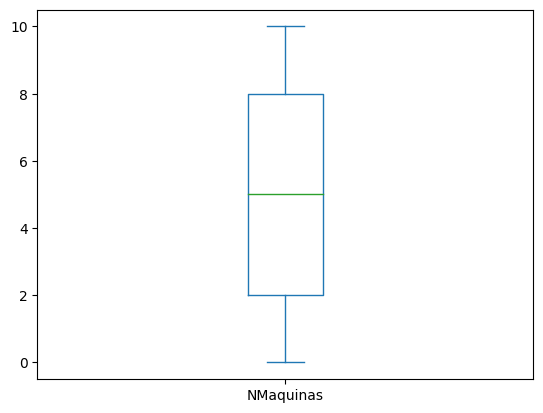

In [24]:
arqv['NMaquinas'].plot(kind = 'box')

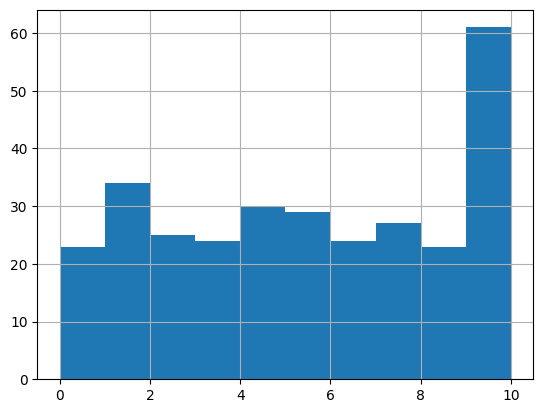

In [25]:
arqv['NMaquinas'].hist();

Número de trabalhadores no campo

<Axes: >

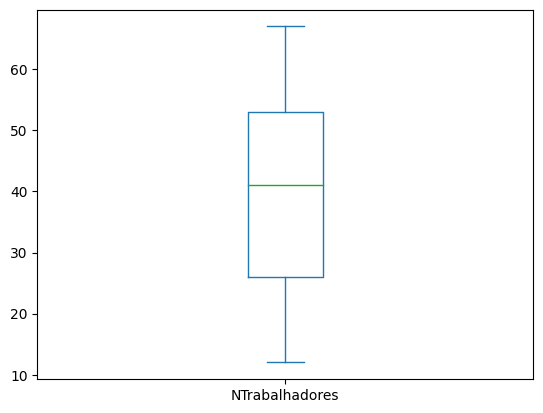

In [26]:
arqv['NTrabalhadores'].plot(kind = 'box')

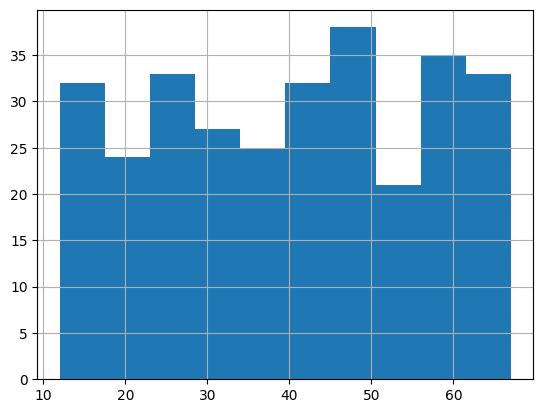

In [27]:
arqv['NTrabalhadores'].hist();

Espacamento do plantio

<Axes: >

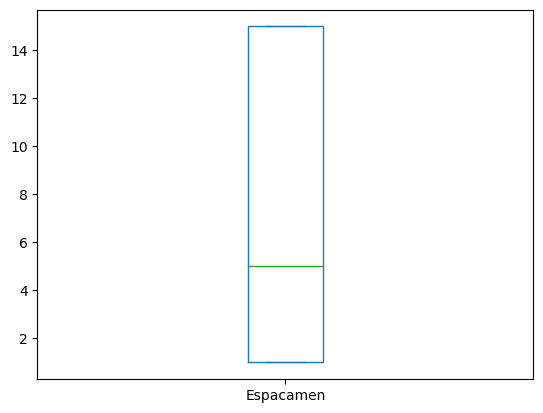

In [28]:
arqv['Espacamen'].plot(kind = 'box')

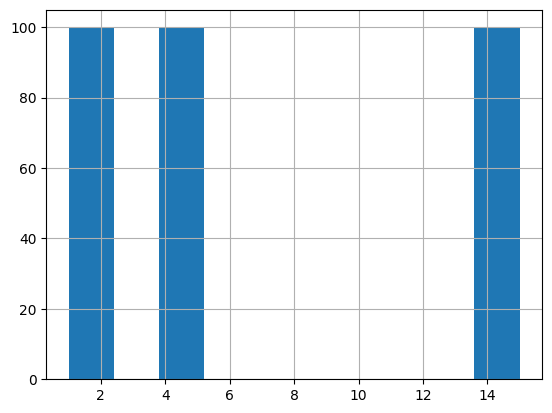

In [29]:
arqv['Espacamen'].hist();

Peso médio da batata doce (gramas)

<Axes: >

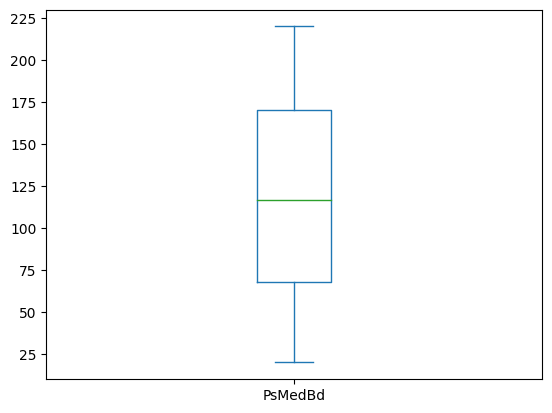

In [30]:
arqv['PsMedBd'].plot(kind = 'box')

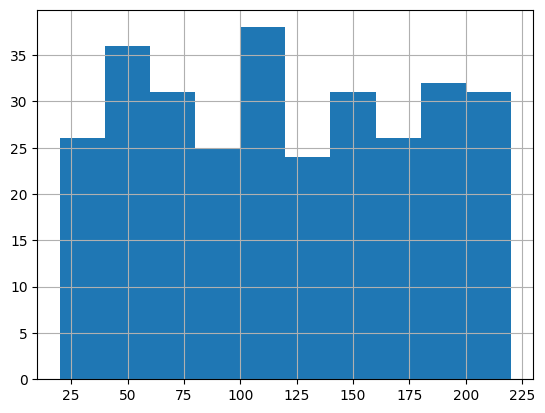

In [31]:
arqv['PsMedBd'].hist();

Peso médio da batata inglesa (gramas)

<Axes: >

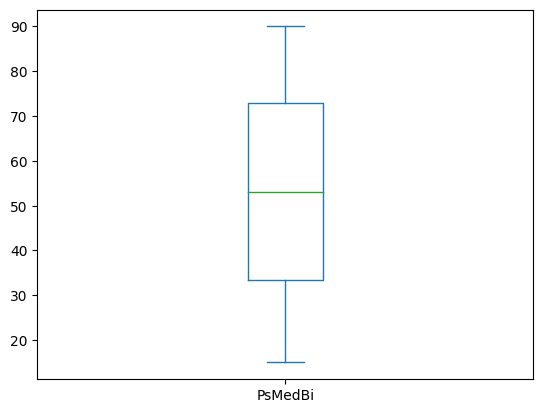

In [32]:
arqv['PsMedBi'].plot(kind = 'box')

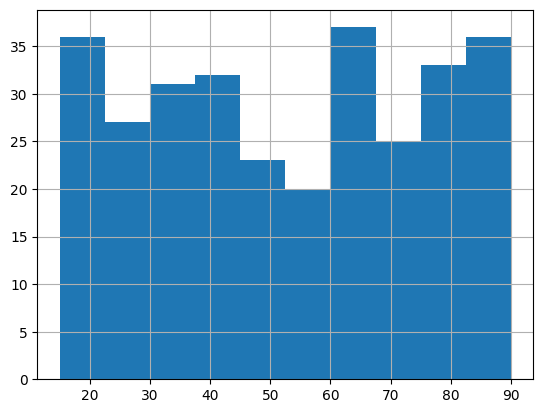

In [33]:
arqv['PsMedBi'].hist();

Teor de sólidos solúveis batata doce: a quantidade de açúcares e outros
compostos solúveis nos frutos, expressa em graus Brix

<Axes: >

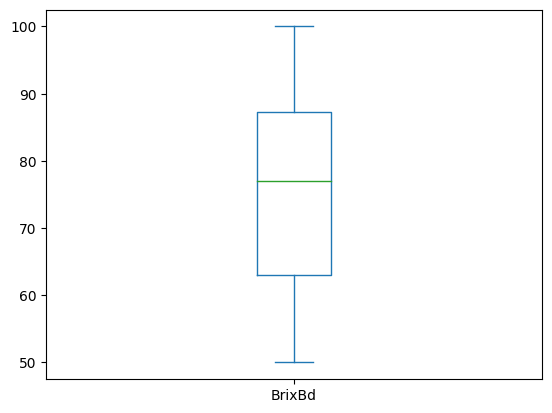

In [34]:
arqv['BrixBd'].plot(kind = 'box')

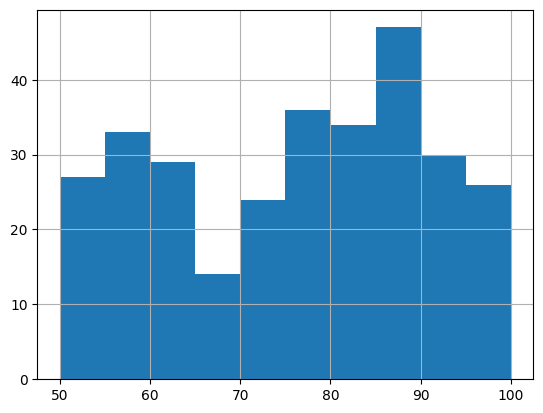

In [35]:
arqv['BrixBd'].hist();

Teor de sólidos solúveis batata inglesa: a quantidade de açúcares e outros compostos solúveis nos frutos, expressa em graus Brix.

<Axes: >

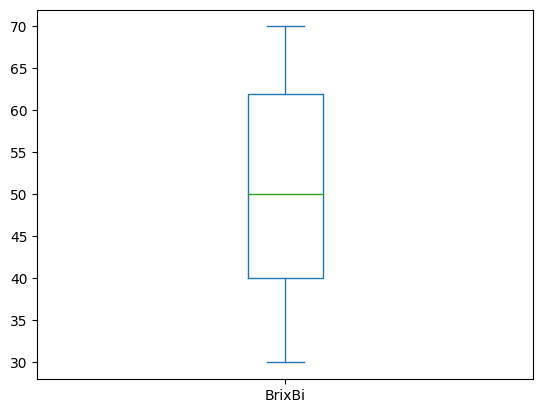

In [36]:
arqv['BrixBi'].plot(kind = 'box')

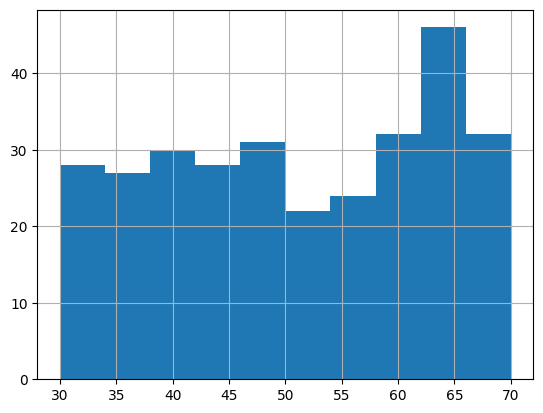

In [37]:
arqv['BrixBi'].hist();

temperatura

<Axes: >

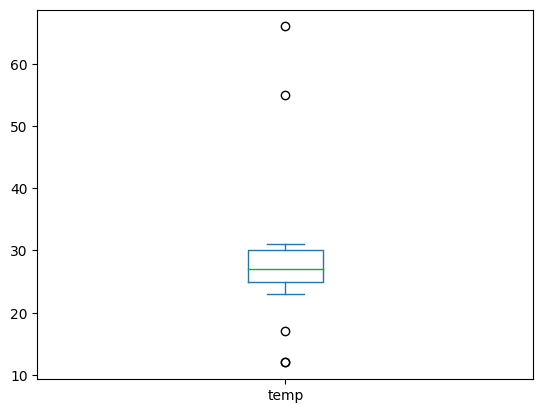

In [38]:
arqv['temp'].plot(kind = 'box')

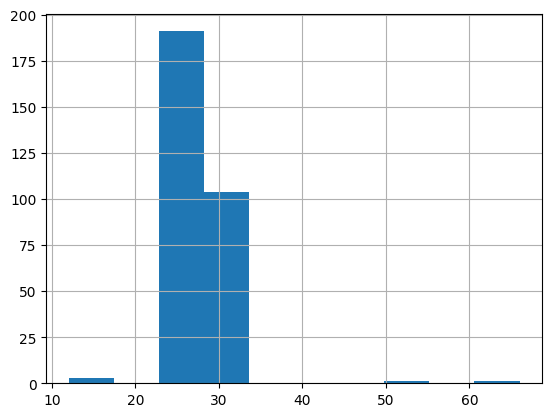

In [39]:
arqv['temp'].hist();

umidade

<Axes: >

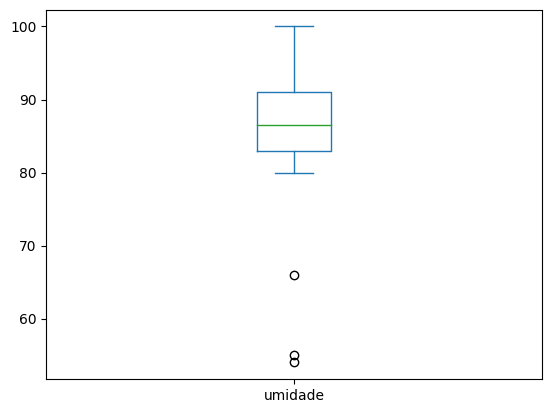

In [40]:
arqv['umidade'].plot(kind = 'box')

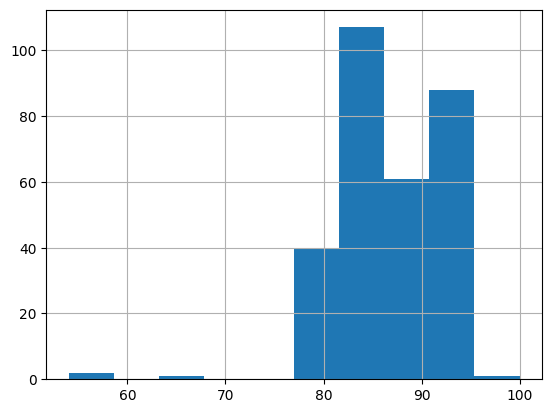

In [41]:
arqv['umidade'].hist();

precipitação (trimeste/mm)

<Axes: >

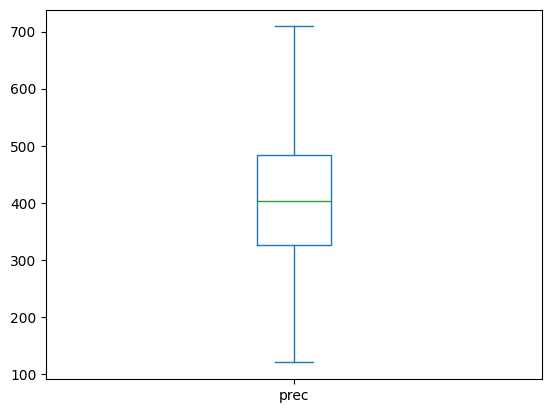

In [42]:
arqv['prec'].plot(kind = 'box')

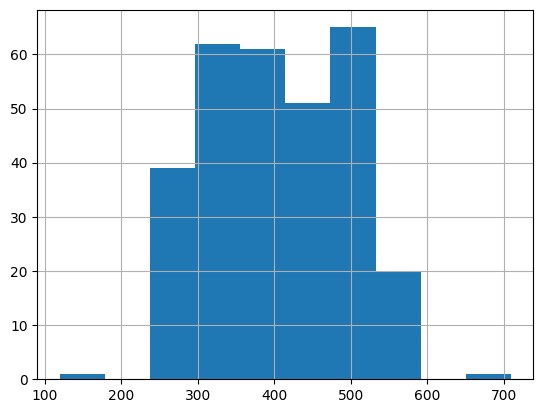

In [43]:
arqv['prec'].hist();

Producao total batata doce mensal (kg)

<Axes: >

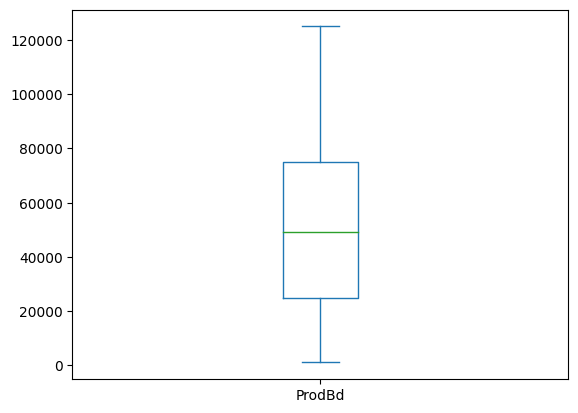

In [44]:
arqv['ProdBd'].plot(kind = 'box')

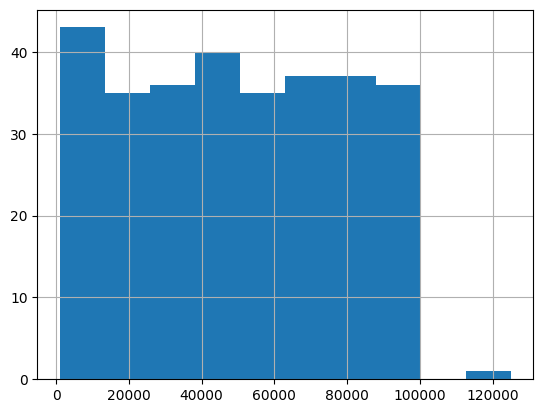

In [45]:
arqv['ProdBd'].hist();

Producao total batata inglesamensal (Kg)

<Axes: >

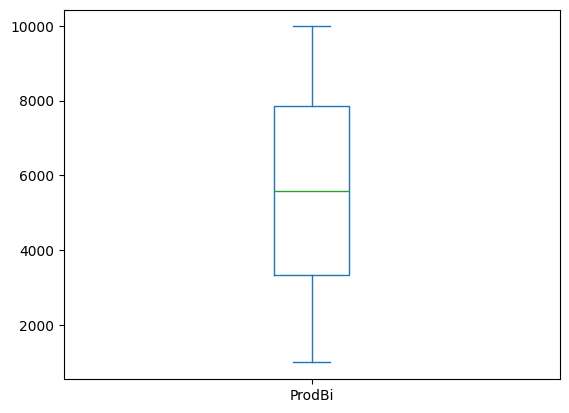

In [46]:
arqv['ProdBi'].plot(kind = 'box')

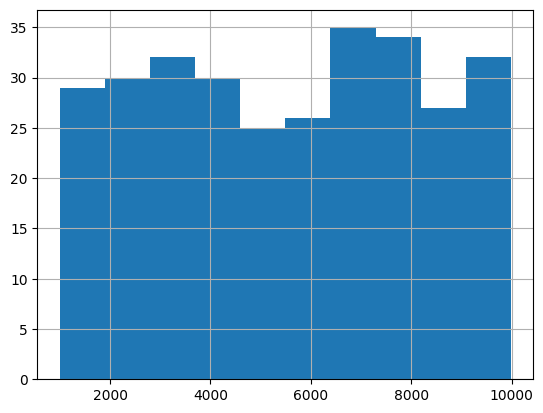

In [47]:
arqv['ProdBi'].hist();

Q3) Identifique e analise valores atípicos ou discrepantes nos dados. Valores atípicos podemafetar
as medidas de tendência central e a interpretação dos resultados. Estes valores atípicos devemser os valores que estão fora do Intervalo de Confiança para média.

#Resposta: Analise do boxPlot de tempo e umidade


Q4)Visualize o cruzamento de variáveis mostrando o comportamento por UF das variaveis
agricolas e climáticas. Represente com gráficos descritivos para visualizar os dados. Utilize
gráficos de barras entre outros. (-qual a produção total e a media por UF, -qual a produção total
por tipo de cultivo, - qual a temperatura, umidade e precipitação total e media por UF

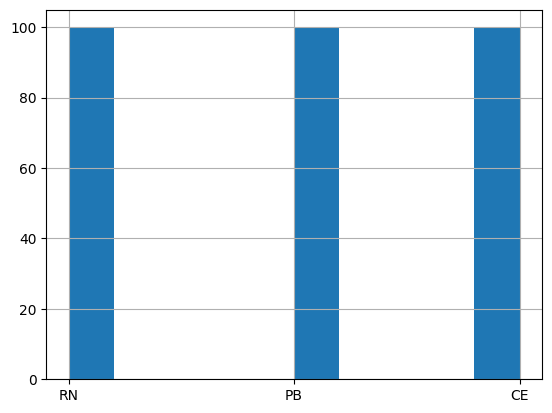

In [48]:
arqv['UF'].hist();

In [49]:
producao_total_por_uf = arqv.groupby('UF')['ProdBd', 'ProdBi'].sum().sum(axis=1)

num_empresas_por_uf = arqv.groupby('UF').size()

# Calculando a média de produção por UF
producao_media_por_uf = producao_total_por_uf / num_empresas_por_uf
producao_total_por_cultivo = arqv.groupby('MetdCult')['ProdBd', 'ProdBi'].sum().sum(axis=1)
dados_por_uf = arqv.groupby('UF')['temp', 'umidade', 'prec'].agg(['sum', 'mean'])

print(dados_por_uf)

    temp        umidade          prec        
     sum   mean     sum   mean    sum    mean
UF                                           
CE  2732  27.32    8712  87.12  39504  395.04
PB  2712  27.12    8651  86.51  41558  415.58
RN  2736  27.36    8708  87.08  40007  400.07


<ipython-input-49-2b2b99aefea6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  producao_total_por_uf = arqv.groupby('UF')['ProdBd', 'ProdBi'].sum().sum(axis=1)
<ipython-input-49-2b2b99aefea6>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  producao_total_por_cultivo = arqv.groupby('MetdCult')['ProdBd', 'ProdBi'].sum().sum(axis=1)
<ipython-input-49-2b2b99aefea6>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dados_por_uf = arqv.groupby('UF')['temp', 'umidade', 'prec'].agg(['sum', 'mean'])


Q5) Identifique as correlacoes de Pearson entre todas as variáveis dependentes (producoes
agricolas) com as independentes.

<ipython-input-50-1a01074d84af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = arqv.corr()
<ipython-input-50-1a01074d84af>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  arqv.corr()


,NMaquinas,NTrabalhadores,Espacamen,PsMedBd,PsMedBi,BrixBd,BrixBi,temp,umidade,prec,ProdBd,ProdBi
NMaquinas,1.000000,0.001465,-0.033296,0.042600,0.038848,0.047796,0.041224,-0.011506,-0.116340,-0.074678,0.027546,0.030776
NTrabalhadores,0.001465,1.000000,-0.015547,-0.002244,-0.003526,-0.007180,-0.007486,-0.038563,0.004506,0.014372,0.008084,-0.001610
Espacamen,-0.033296,-0.015547,1.000000,0.006532,0.005485,0.005112,0.006366,-0.035169,-0.040228,0.090260,0.020072,0.012536
PsMedBd,0.042600,-0.002244,0.006532,1.000000,0.998249,0.994849,0.997350,0.004548,0.017156,-0.020190,0.985425,0.996271
PsMedBi,0.038848,-0.003526,0.005485,0.998249,1.000000,0.994287,0.998457,0.004280,0.014560,-0.024243,0.984321,0.995978
BrixBd,0.047796,-0.007180,0.005112,0.994849,0.994287,1.000000,0.996306,-0.001960,0.012876,-0.015656,0.983662,0.993640
BrixBi,0.041224,-0.007486,0.006366,0.997350,0.998457,0.996306,1.000000,0.005899,0.012329,-0.024114,0.984454,0.995261
temp,-0.011506,-0.038563,-0.035169,0.004548,0.004280,-0.001960,0.005899,1.000000,-0.223601,-0.113893,-0.050894,-0.030453
umidade,-0.116340,0.004506,-0.040228,0.017156,0.014560,0.012876,0.012329,-0.223601,1.000000,0.048829,0.047266,0.036653
prec,-0.074678,0.014372,0.090260,-0.020190,-0.024243,-0.015656,-0.024114,-0.113893,0.048829,1.000000,0.016329,-0.002953


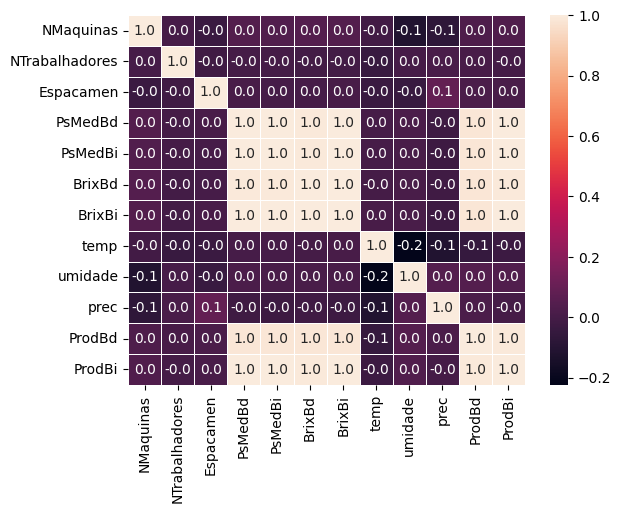

In [50]:
correlation = arqv.corr()

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

arqv.corr()

Q6) Aplique a regressão Multipla pra identificar a relacao das produções agricolas e as variáveis
climáticas. O método estatístico utilizado para modelar a relação entre uma variável dependente
e duas ou mais variáveis independentes. No Python, você pode realizar regressão múltipla
utilizando bibliotecas como o NumPy, o pandas e o scikit-learn

In [62]:
#Variáveis independentes
X = arqv[['temp', 'umidade', 'prec', 'NTrabalhadores']]

# Variável dependente 'ProdBd'
y_prodbd = arqv['ProdBd']
modelo_prodbd = LinearRegression()
modelo_prodbd.fit(X, y_prodbd)

# Variável dependente 'ProdBi'
y_prodbi = arqv['ProdBi']
modelo_prodbi = LinearRegression()
modelo_prodbi.fit(X, y_prodbi)

# Coeficientes e termo independente para 'ProdBd'
coeficientes_prodbd = modelo_prodbd.coef_
termo_ind_prodbd = modelo_prodbd.intercept_

# Coeficientes e termo independente para 'ProdBi'
coeficientes_prodbi = modelo_prodbi.coef_
termo_ind_prodbi = modelo_prodbi.intercept_

# Imprimir coeficientes para cada variável independente
for i, column in enumerate(X.columns):
    print(f'Coeficiente para {column} em ProdBd: {coeficientes_prodbd[i]}')
    print(f'Coeficiente para {column} em ProdBi: {coeficientes_prodbi[i]}')

# Imprimir termo independente
print(f'Termo independente em ProdBd: {termo_ind_prodbd}')
print(f'Termo independente em ProdBi: {termo_ind_prodbi}')

Coeficiente para temp em ProdBd: -298.13721260358125
Coeficiente para temp em ProdBi: -15.88663346907935
Coeficiente para umidade em ProdBd: 198.52701191945806
Coeficiente para umidade em ProdBi: 15.052144468209825
Coeficiente para prec em ProdBd: 3.1639239551535923
Coeficiente para prec em ProdBi: -0.2121714613813186
Coeficiente para NTrabalhadores em ProdBd: 11.209924446903788
Coeficiente para NTrabalhadores em ProdBi: -0.4225030742694813
Termo independente em ProdBd: 39320.495226334126
Termo independente em ProdBi: 4745.914672882789


Q7) Aplique os dois tipos de estatística de teste para realizar um teste de comparação de médias. Você pode utilizar diferentes métodos estatísticos, dependendo das características dos seus dados e do objetivo da comparação. Os dois métodos comuns: o teste t de Student (2 var independentes) e a análise de variância- ANOVA (mais de um var independentes). Escolha umadas variáveis independentes e aplique o teste

In [53]:
# Dados das amostras independentes
X = arqv[arqv['temp'] < 25]['ProdBd']
Y = arqv[arqv['temp'] >= 25]['ProdBd']

# Teste t de Student
t_statistic, p_value = stats.ttest_ind(X, Y)

# Imprimir os resultados
print("Teste t de Student:")
print("Estatística t:", t_statistic)
print("Valor de p:", p_value)

Teste t de Student:
Estatística t: -0.265155664660419
Valor de p: 0.7910728687379285


In [52]:
# Dados das variáveis independentes e dependente
VI1 = arqv['temp']
VI2 = arqv['umidade']
VI3 = arqv['prec']
VD = arqv['ProdBd']

# Teste ANOVA
f_statistic, p_value = stats.f_oneway(VI1, VI2, VI3, VD)

# Imprimir os resultados
print("Teste ANOVA:")
print("Estatística F:", f_statistic)
print("Valor de p:", p_value)


Teste ANOVA:
Estatística F: 879.1539683411796
Valor de p: 7.174246656045777e-302


In [54]:
def regressao_multipla(dados):
    # Carregar os dados do banco de dados para um DataFrame do pandas

    # Separar as variáveis independentes (climáticas) da variável dependente (produção agrícola)
    X = arqv.iloc[:, 4:-2].values  # A partir da quarta coluna até a antepenúltima são as variáveis independentes
    y = arqv.iloc[:, -2:].values   # As duas últimas colunas são as variáveis dependentes


    # Criar o objeto de regressão linear
    regressor = LinearRegression()

    # Treinar o modelo de regressão múltipla
    regressor.fit(X, y)

    # Imprimir os coeficientes de regressão
    coeficientes = regressor.coef_
    print("Coeficientes de regressão:")
    for i, coef in enumerate(coeficientes):
        print(f"Variável {i+1}: {coef}")

    # Imprimir o coeficiente de intercepção
    intercepto = regressor.intercept_
    print(f"Coeficiente de intercepção: {intercepto}")

    # Realizar previsões
    previsoes = regressor.predict(X)
    print("Previsões:")
    for i, prev in enumerate(previsoes):
        print(f"Previsão {i+1}: {prev}")

# Exemplo de uso da função
regressao_multipla("arqv.csv")  # Substitua "dados.csv" pelo caminho ou nome do arquivo do banco de dados


Coeficientes de regressão:
Variável 1: [-104.66084555   18.82670689   51.32920905  293.71331865  -46.86191618
  450.0838798   534.81461874 -333.84553807  103.59504423    9.06829397]
Variável 2: [ -7.53041509   0.1142065    2.12490569  20.02136559  44.36170744
  36.16037961  -4.33302621 -19.01032818   6.31898488   0.37297969]
Coeficiente de intercepção: [-47582.52916182  -1880.97760912]
Previsões:
Previsão 1: [6836.9411735  1557.82171824]
Previsão 2: [-438.33613532 1532.38675427]
Previsão 3: [13933.82734522  2153.77341321]
Previsão 4: [23418.44461119  3248.26054335]
Previsão 5: [9934.57428744 1814.90922823]
Previsão 6: [22313.86406697  2980.58209597]
Previsão 7: [12205.683639    2095.26229215]
Previsão 8: [28341.91815077  3540.87177319]
Previsão 9: [5710.49933231 1395.55179998]
Previsão 10: [15449.5087522   2491.38540132]
Previsão 11: [55561.62621602  5493.25463981]
Previsão 12: [61415.66121106  6603.40402858]
Previsão 13: [40552.20641289  4514.40173816]
Previsão 14: [52074.84422312  57

<Axes: >

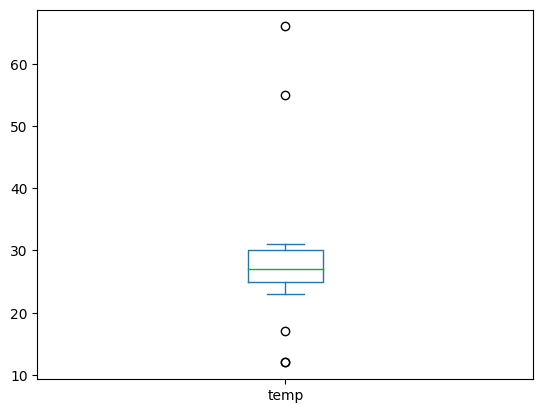

In [55]:
arqv['temp'].plot(kind = 'box')

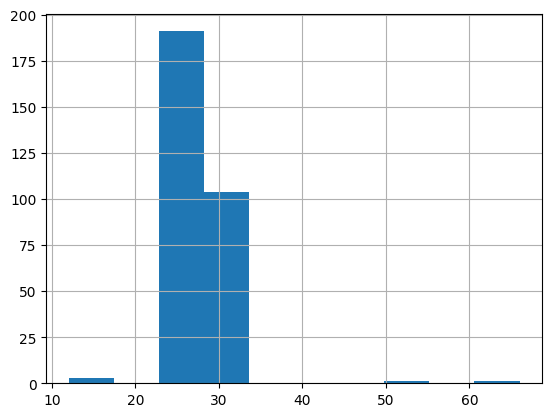

In [56]:
arqv['temp'].hist();

In [57]:
X = arqv[['temp', 'umidade', 'prec', 'NTrabalhadores']]

y_prodbd = arqv['ProdBd']
modelo_prodbd = LinearRegression()
modelo_prodbd.fit(X, y_prodbd)

y_prodbi = arqv['ProdBi']
modelo_prodbi = LinearRegression()
modelo_prodbi.fit(X, y_prodbi)

coeficientes_prodbd = modelo_prodbd.coef_
termo_ind_prodbd = modelo_prodbd.intercept_

coeficientes_prodbi = modelo_prodbi.coef_
termo_ind_prodbi = modelo_prodbi.intercept_

for i, column in enumerate(X.columns):
	print(f'Coeficiente para {column} em ProdBd: {coeficientes_prodbd[i]}')

	print(f'Coeficiente para {column} em ProdBi: {coeficientes_prodbi[i]}')

print(f'Termo independente em ProdBd: {termo_ind_prodbd}')

print(f'Termo independente em ProdBi: {termo_ind_prodbi}')

Coeficiente para temp em ProdBd: -298.13721260358125
Coeficiente para temp em ProdBi: -15.88663346907935
Coeficiente para umidade em ProdBd: 198.52701191945806
Coeficiente para umidade em ProdBi: 15.052144468209825
Coeficiente para prec em ProdBd: 3.1639239551535923
Coeficiente para prec em ProdBi: -0.2121714613813186
Coeficiente para NTrabalhadores em ProdBd: 11.209924446903788
Coeficiente para NTrabalhadores em ProdBi: -0.4225030742694813
Termo independente em ProdBd: 39320.495226334126
Termo independente em ProdBi: 4745.914672882789


In [58]:
# Dados das amostras independentes
X = arqv[arqv['temp'] < 25]['ProdBd']
Y = arqv[arqv['temp'] >= 25]['ProdBd']

# Teste t de Student
t_statistic, p_value = stats.ttest_ind(X, Y)

# Imprimir os resultados
print("Teste t de Student:")
print("Estatística t:", t_statistic)
print("Valor de p:", p_value)


Teste t de Student:
Estatística t: -0.265155664660419
Valor de p: 0.7910728687379285


In [59]:
# Dados das variáveis independentes e dependente
VI1 = arqv['temp']
VI2 = arqv['umidade']
VI3 = arqv['prec']
VD = arqv['ProdBd']

# Teste ANOVA
f_statistic, p_value = stats.f_oneway(VI1, VI2, VI3, VD)

# Imprimir os resultados
print("Teste ANOVA:")
print("Estatística F:", f_statistic)
print("Valor de p:", p_value)


Teste ANOVA:
Estatística F: 879.1539683411796
Valor de p: 7.174246656045777e-302
